In [0]:
from mpmath import *
from sympy import *
init_printing(use_latex='matplotlib')

In [0]:
"abcdef".index('d')

In [0]:
def s_gcd(a, b) : 
  '''Stein's algorithm for binay GCD'''
  if (a == 0) : 
      return b 

  if (b == 0) : 
      return a 

  k = 0

  while(((a | b) & 1) == 0) : 
      a = a >> 1
      b = b >> 1
      k = k + 1

  # Dividing a by 2 until a becomes odd  
  while ((a & 1) == 0) : 
      a = a >> 1

  # From here on, 'a' is always odd.  
  while(b != 0) : 

      # If b is even, remove all  
      # factor of 2 in b  
      while ((b & 1) == 0) : 
          b = b >> 1

      # Now a and b are both odd. Swap if 
      # necessary so a <= b, then set  
      # b = b - a (which is even). 
      if (a > b) : 

          # Swap u and v. 
          temp = a 
          a = b 
          b = temp 

      b = (b - a) 

  # restore common factors of 2  
  return (a << k) 

In [0]:
def mp_round(a,prec = 0):
  '''We assume a is a mp math object'''
  a = str(a)
  point = a.index(".")
  if point is None:
    print("no point")
    return a
  if prec == 0:
    return mpf(a[:(point)])
  return mpf(a[:(point+prec+1)])

In [0]:
mp.dps = 400
a = mp.sqrt(202717496683172003287108670252702383828245235746957602058259296841640537125751738707)
print(a)
print(mp_round(a,0))
b = mp_round(a,0) + 100
print(b)

450241598126130503906926616581623754518871.2865823855996088536932834794359355566121641020727572296259196445926693261551668729215432135168124092085947825172911577580308152810169587375482903274693677630488942987257508081861521053259153037266924285531690792115803354113130008013806182655314163943035646625704598203213264358314310009765288672134567917378373166625403517392229555487664353386191632791162478
450241598126130503906926616581623754518871.0
450241598126130503906926616581623754518971.0


In [0]:
451**21

In [0]:
def check_perfect_pow(n):
  n = int(n)
  if n < 4: return None
  sr = mp_round(mp.sqrt(n),7)
  #print(sr)
  if sr == mp_round(sr): return [sr, 2]
  for m in range(2,n//2):
      k = mp_round(mp.log(n, m),6)
      #print(k)
      if k == mp_round(k): return [m, k]
  return None

In [0]:
check_perfect_pow(3654028023029375319103979618935387459609954982524408962375220930643584428367449611016214781781690817936677702046773359582582351200663779108024994987057737888353314941248706611186458098340308129750461770544895338725099157414429945570055532794134785392747659999390767817284161192576008291324183952074800206883317506233826199966998276882825216)

[6536, mpf('89.0')]

In [0]:
import random
for i in range(6):
  a = random.randint(2,10000)
  b = random.randint(3,100)
  if b%2 == 0:
    b = b + 1
  print(a,b,pow(a,b))

2186 15 124380518871819987023401180224571526120608515915776
4118 69 2590345042902903773442514569744359569010248165036676292818391846904793148053923471983304423629615831190964385314327964282547575340630569034037530486950139994046353648009263491653255151643803614834407203302230882027029030822886540335223427654922272768
3467 75 31371705123354974867735315968694874088001669853313612059333746607912514414200751309283960355886929846259499410297814020054140408020667303047357302816406677909751313197980756257548812268715351432308840120772416101477313077338737502505274540232092485213762751247903443
735 99 57869078842173730541113518331190808640486004023258070837319624997045458687003215429692237701560969317158592292720769655184952765293911583486273653580089042395498719782677473013560816827424310698292576899800609799347563129510797228768474945322618230303390873814350925385951995849609375
1626 49 2212618410227729245012615143212448271848166901986258896213492334369559078535086316663775985916739782182021

In [0]:
def minimum_ord_r(n):
  log_n = mp.log(n,2)
  log_n2 = mp.power(log_n,2)
  #q = mp_round(log_n2,0)
  q = int(log_n2) + 1
  while True:
    found_r = True
    j = 1
    while j < log_n2:
      n_int = int(n)
      res = pow(n_int,j,q)
      if res == 1:
        found_r = False
        break
      j = j + 1
    
    if found_r:
      r = q
      break
    q = q + 1
  return r

In [0]:
minimum_ord_r(311)

In [0]:
def is_AKS_prime(n):
  if fmod(n,2) == 0:
    return "Composite"
  if check_perfect_pow(n) is not None:
    return "Composite"
  r = minimum_ord_r(n)
  aflag = True
  for a in range(2,r+1):
    if s_gcd(a,r) == 1:
      print(a,r)
      aflag = False
  if aflag:
    return "Composite"

In [0]:
def pascal(n):
  line = [mpf(1)]
  for k in range(n):
    line.append(fdiv(fmul(line[k],n-k),(k+1)))
    #line.append(line[k] * (n-k) / (k+1))
  return line

In [0]:
from numpy.polynomial import polynomial as P
c1 = (1,1)
for i in range(2):
  c1 = P.polymul(c1,c1)


In [0]:
from sympy import *
x = symbols('x')
#init_printing(use_unicode=False, wrap_line=False)

In [0]:
asi = str(bin(80))[2:][::-1]

In [0]:
def nbinomial(n):
  e = (x+1)
  bn = str(bin(n))[2:][::-1]
  allpoly = []
  for i in range(len(bn)):
    e = e * e
    allpoly.append(e)
  ans = 1
  for cnt,c in enumerate(bn):
    c = int(c)
    if c == 1:
      ans = ans * allpoly[cnt]
  return ans

def nbinomial2(n):
  e = 1
  for i in range(n):
    e = e*(x+1)
  return e

In [0]:
e = (x + 1)*(x+1)
e = e * e
nbinomial2(80).as_poly()

# Efiicent Function Implementaions

In [0]:
def jacobi(n,k):
  assert(k>0 and k%2 == 1)
  t = 1
  while n != 0:
    while n%2==0:
      n = n/2
      r = k % 8
      if r==3 or r==5:
        t = -t
    n,k=k,n
    if n%4==k%4==3:
      t = -t
    n = n%k
  if k == 1:
    return t
  else:
    return 0

In [0]:
import random
random.randint(3,34)

In [0]:
def Solovay_Strassen_prime(n,trials=3):
  for k in range(trials):
    a = random.randint(2,n-1)
    x = jacobi(a,n)
    print(a,x)
    md = pow(a,(n-1)//2,n)
    print(md)
    if md == n-1:
      md = -1
    print("---")
    if md==0 or md != x:
      return "Composite"
  return "Probably prime"

In [0]:
def rabinMiller_prime(num,trail=5):

    s = num - 1
    t = 0
    while s % 2 == 0:
        s = s // 2
        t += 1

    for trials in range(trail): 
        a = random.randrange(2, num - 1)
        v = pow(a, s, num)
        if v != 1: # this test does not apply if v is 1.
            i = 0
            while v != (num - 1):
                if i == t - 1:
                    return "Composite"
                else:
                    i = i + 1
                    v = (v ** 2) % num
    return "Probably Prime"

In [0]:
rabinMiller_prime(100000000069)

'Probably Prime'

***Quadratic Frobenius test***

In [0]:
from random import SystemRandom
random = SystemRandom().randrange

def computeGCD(x, y): 
  
   while(y): 
       x, y = y, x % y 
  
   return x 

def find_prime_number(bits, test):
    number = random((1 << bits - 1) + 1, 1 << bits, 2)
    while True:
        for _ in range(test):
            if not frobenius_pseudoprime(number):
                break
        else:
            return number
        number += 2

def frobenius_pseudoprime(integer):
    assert integer & 1 and integer >= 3
    a, b, d = choose_ab(integer)
    w1 = (a ** 2 * extended_gcd(b, integer)[0] - 2) % integer
    m = (integer - jacobi_symbol(d, integer)) >> 1
    wm, wm1 = compute_wm_wm1(w1, m, integer)
    if w1 * wm != 2 * wm1 % integer:
        return False
    b = pow(b, (integer - 1) >> 1, integer)
    return b * wm % integer == 2

def choose_ab(integer):
    a, b = random(1, integer), random(1, integer)
    d = a ** 2 - 4 * b
    while is_square(d) or computeGCD(2 * d * a * b, integer) != 1:
        a, b = random(1, integer), random(1, integer)
        d = a ** 2 - 4 * b
    return a, b, d

def is_square(integer):
    if integer < 0:
        return False
    if integer < 2:
        return True
    x = integer >> 1
    seen = set([x])
    while x * x != integer:
        x = (x + integer // x) >> 1
        if x in seen:
            return False
        seen.add(x)
    return True

def extended_gcd(n, d):
    x1, x2, y1, y2 = 0, 1, 1, 0
    while d:
        n, (q, d) = d, divmod(n, d)
        x1, x2, y1, y2 = x2 - q * x1, x1, y2 - q * y1, y1
    return x2, y2

def jacobi_symbol(n, d):
    j = 1
    while n:
        while not n & 1:
            n >>= 1
            if d & 7 in {3, 5}:
                j = -j
        n, d = d, n
        if n & 3 == 3 == d & 3:
            j = -j
        n %= d
    return j if d == 1 else 0

def compute_wm_wm1(w1, m, n):
    a, b = 2, w1
    for shift in range(m.bit_length() - 1, -1, -1):
        if m >> shift & 1:
            a, b = (a * b - w1) % n, (b * b - 2) % n
        else:
            a, b = (a * a - 2) % n, (a * b - w1) % n
    return a, b



In [0]:
print('Probably prime:\n', find_prime_number(500, 3))

Probably prime:
 2473150561266080576975522659504118215239807332403710026498770969280599917522137222065345846132730503524281311458590413419867927707611430425340979591663


In [0]:
frobenius_pseudoprime(1159)

False

**Strong Lucas pseudoprimes**

In [0]:
# lucas pseudoprimality test
def computeGCD(x, y): 
  
   while(y): 
       x, y = y, x % y 
  
   return x 

def selfridge(n):
    d, s = 5, 1
    while True:
        ds = d * s
        if computeGCD(ds, n) > 1:
            return ds, 0, 0
        if jacobi(ds, n) == -1:
            return ds, 1, (1 - ds) / 4
        d, s = d + 2, s * -1

def lucasPQ(p, q, m, n):
    # nth element of lucas sequence with
    # parameters p and q (mod m); ignore
    # modulus operation when m is zero
    def mod(x):
        if m == 0: return x
        return x % m
    def half(x):
        if x % 2 == 1: x = x + m
        return mod(x / 2)
    un, vn, qn = 1, p, q
    u = 0 if n % 2 == 0 else 1
    v = 2 if n % 2 == 0 else p
    k = 1 if n % 2 == 0 else q
    n, d = n // 2, p * p - 4 * q
    while n > 0:
        u2 = mod(un * vn)
        v2 = mod(vn * vn - 2 * qn)
        q2 = mod(qn * qn)
        n2 = n // 2
        if n % 2 == 1:
            uu = half(u * v2 + u2 * v)
            vv = half(v * v2 + d * u * u2)
            u, v, k = uu, vv, k * q2
        un, vn, qn, n = u2, v2, q2, n2
    return u, v, k

def isLucasPseudoprime(n):
    d, p, q = selfridge(n)
    print(d, p, q)
    if p == 0: return n == d
    u, v, k = lucasPQ(p, q, n, n+1)
    return u == 0



In [0]:
print(isLucasPseudoprime(1111))

-11 0 0
False


**Baillie–PSW primality test**

In [0]:
def U_V_subscript(k, n, U, V, P, Q, D):
    k, n, U, V, P, Q, D = map(int, (k, n, U, V, P, Q, D))
    digits = list(map(int, str(bin(k))[2:]))
    subscript = 1
    for digit in digits[1:]:
        U, V = U*V % n, (pow(V, 2, n) - 2*pow(Q, subscript, n)) % n
        subscript *= 2
        if digit == 1:
            if not (P*U + V) & 1:
                if not (D*U + P*V) & 1:
                    U, V = (P*U + V) >> 1, (D*U + P*V) >> 1
                else:
                    U, V = (P*U + V) >> 1, (D*U + P*V + n) >> 1
            elif not (D*U + P*V) & 1:
                U, V = (P*U + V + n) >> 1, (D*U + P*V) >> 1
            else:
                U, V = (P*U + V + n) >> 1, (D*U + P*V + n) >> 1
            subscript += 1
            U, V = U % n, V % n
    return U, V

def lucas_pp(n, D, P, Q):                                                                                                                                                                                                                         
    """Perform the Lucas probable prime test"""
    U, V = U_V_subscript(n+1, n, 1, P, P, Q, D)

    if U != 0:
        return False

    d = n + 1
    s = 0
    while not d & 1:
        d = d >> 1
        s += 1

    U, V = U_V_subscript(n+1, n, 1, P, P, Q, D)

    if U == 0:
        return True

    for r in range(s):
        U, V = (U*V) % n, (pow(V, 2, n) - 2*pow(Q, d*(2**r), n)) % n
        if V == 0:
            return True

    return False

In [0]:
def miller_rabin_base_2(n):
    """Perform the Miller Rabin primality test base 2"""
    d = n-1
    s = 0
    while not d & 1: # Check for divisibility by 2
        d = d >> 1 # Divide by 2 using a binary right shift
        s += 1

    x = pow(2, d, n)
    if x == 1 or x == n-1:
        return True
    for i in range(s-1):
        x = pow(x, 2, n)
        if x == 1:
            return False
        elif x == n - 1:
            return True
    return False

In [0]:
#from math import sqrt

def D_chooser(candidate):
    """Choose a D value suitable for the Baillie-PSW test"""
    D = 5
    while jacobi(D, candidate) != -1:
        D += 2 if D > 0 else -2
        D *= -1
    return D

def baillie_psw(candidate):
    """Perform the Baillie-PSW probabilistic primality test on candidate"""

    # Check divisibility by a short list of primes less than 50
    for known_prime in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]:
        if candidate == known_prime:
            return True
        elif candidate % known_prime == 0:
            print("Known Prime divisor",known_prime)
            return False

    # Now perform the Miller-Rabin primality test base 2
    if not miller_rabin_base_2(candidate):
        return False
    
    # Check that the number isn't a square number, as this will throw out 
    # calculating the correct value of D later on (and means we have a
    # composite number)
    # the slight ugliness is from having to deal with floating point numbers
    if int(mp.sqrt(candidate) + 0.5) ** 2 == candidate:
        return False

    # Finally perform the Lucas primality test
    D = D_chooser(candidate)
    if not lucas_pp(candidate, D, 1, (1-D)/4):
        return False

    # You've probably got a prime!
    return True

In [0]:
baillie_psw(pow(2,pow(2,12))+1)

False

In [0]:
pow(2,pow(2,14)) + 1

# Ploting and elliptic curves

In [0]:
!pip install plotly==4.1.0

     |████████████████████████████████| 7.1MB 4.8MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


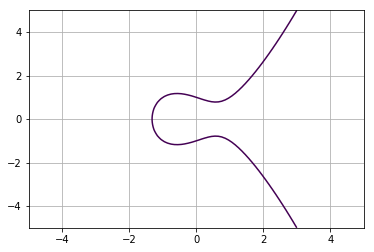

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def main():
    a = -1
    b = 1

    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()

In [0]:
import plotly.graph_objects as go

fig = go.Figure(data = 
         go.Contour(
           z=[[10, 10.625, 12.5, 15.625, 20],
              [5.625, 6.25, 8.125, 11.25, 15.625],
              [2.5, 3.125, 5., 8.125, 12.5],
              [0.625, 1.25, 3.125, 6.25, 10.625],
              [0, 0.625, 2.5, 5.625, 10]],
           colorbar=dict(nticks=10, ticks='outside',
                         ticklen=5, tickwidth=1,
                         showticklabels=True,
                         tickangle=0, tickfont_size=12)
            ))

fig.show()

In [0]:
int phi (int n) {
	int result = n;
	for (int i=2; i*i<=n; ++i)
		if (n % i == 0) {
			while (n % i == 0)
				n /= i;
			result -= result / i;
		}
	if (n > 1)
		result -= result / n;
	return result;
}
def f(x):
	""" function for pollard's rho """
	return x**2 + 1

def factor(n,b):
	""" Factor using Pollard's p-1 method """

	a = 2;
	for j in range(2,b):
		a = a**j % n
	
	d = computeGCD(a-1,n);
	print ("d:",d,"a-1:",a-1)
	if 1 < d < n: return d;
	else: return -1;

def factorRho(n,x_1):
	""" Factor using pollard's rho method """
	
	x = x_1;
	xp = f(x) % n
	p = computeGCD(x - xp,n)

	#print ("x_i's: {")
	while p == 1:
		#print (x),
		# in the ith iteration x = x_i and x' = x_2i
		x = f(x) % n
		xp = f(xp) % n
		xp = f(xp) % n
		p = computeGCD(x-xp,n)

	#print ("}")

	if p == n: return -1
	else: return p

def testFactor():
	
	print("Pollard's p-1 factoring")
	
	n = 13493
	s = 2
	d = -1

	print ("n=%i, initial bound=%i" % (n,s))

	while s < n and d == -1:
		s +=1
		d = factor(n,s)
		print("Round %i = %i" % (s,d))

	if d == -1: print ("No Factor could be found ...")
	else: print ("%i has a factor of %i, with b=%i" % (n,d,s))

def testFactorRho():

	print ("Pollard's Rho factoring" )
	n = 459245788322547735796439   
	x_1 = 150

	#print ("n= %i, x_1= %i" % (n,x_1))
	
	p = factorRho(n,x_1)
	print ("p=",p)

testFactorRho();

Pollard's Rho factoring
p= 677676758267


In [0]:
print(677676757717 * 677676758267  )

459245788322547735796439


In [0]:
def euler_phi(n):   # O(sqrt(n)) most efficent known
  result = n
  i = 2
  while(i*i<=n):
    if n%i == 0:
      while(n%i==0):
        n/=i
      result -= result/i
    i = i + 1
  if n > 1:
    result -= result/n
  return int(result)

In [0]:
euler_phi(5873)

5028

In [0]:
MAX = 1000001; 
  
# array to store 
# prime factors 
factor = [0]*(MAX + 1); 
  
# function to generate all  
# prime factors of numbers 
# from 1 to 10^6 
def generatePrimeFactors(): 
    factor[1] = 1; 
  
    # Initializes all the  
    # positions with their value. 
    for i in range(2,MAX): 
        factor[i] = i; 
  
    # Initializes all  
    # multiples of 2 with 2 
    for i in range(4,MAX,2): 
        factor[i] = 2; 
  
    # A modified version of  
    # Sieve of Eratosthenes 
    # to store the smallest  
    # prime factor that divides 
    # every number. 
    i = 3; 
    while(i * i < MAX): 
        # check if it has 
        # no prime factor. 
        if (factor[i] == i): 
            # Initializes of j  
            # starting from i*i 
            j = i * i; 
            while(j < MAX):  
                # if it has no prime factor  
                # before, then stores the  
                # smallest prime divisor 
                if (factor[j] == j): 
                    factor[j] = i; 
                j += i; 
        i+=1; 
  
# function to calculate 
# number of factors 
def divisor_zero(n): 
    if (n == 1): 
        return 1; 
    ans = 1; 
  
    dup = factor[n]; 
  
 
    c = 1; 
  
    j = int(n / factor[n]); 
  
    # false when prime  
    # factorization is done 
    while (j > 1): 
        # if the same prime  
        # number is dividing  
        # n, then we increase 
        # the count 
        if (factor[j] == dup): 
            c += 1; 
  
        # if its a new prime factor 
        # that is factorizing n,  
        # then we again set c=1 and  
        # change dup to the new prime  
        # factor, and apply the formula  
        # explained above.  
        else: 
            dup = factor[j]; 
            ans = ans * (c + 1); 
            c = 1; 
  
        # prime factorizes 
        # a number 
        j = int(j / factor[j]); 
  
    # for the last 
    # prime factor 
    ans = ans * (c + 1); 
  
    return ans; 
# Driver Code 

In [0]:
divisor_zero(564564)

ZeroDivisionError: ignored

In [0]:
from mpmath import cplot,exp,zeta,gamma

In [0]:
import mpmath as mp
import matplotlib

matplotlib.rc('figure', figsize=(20, 20))

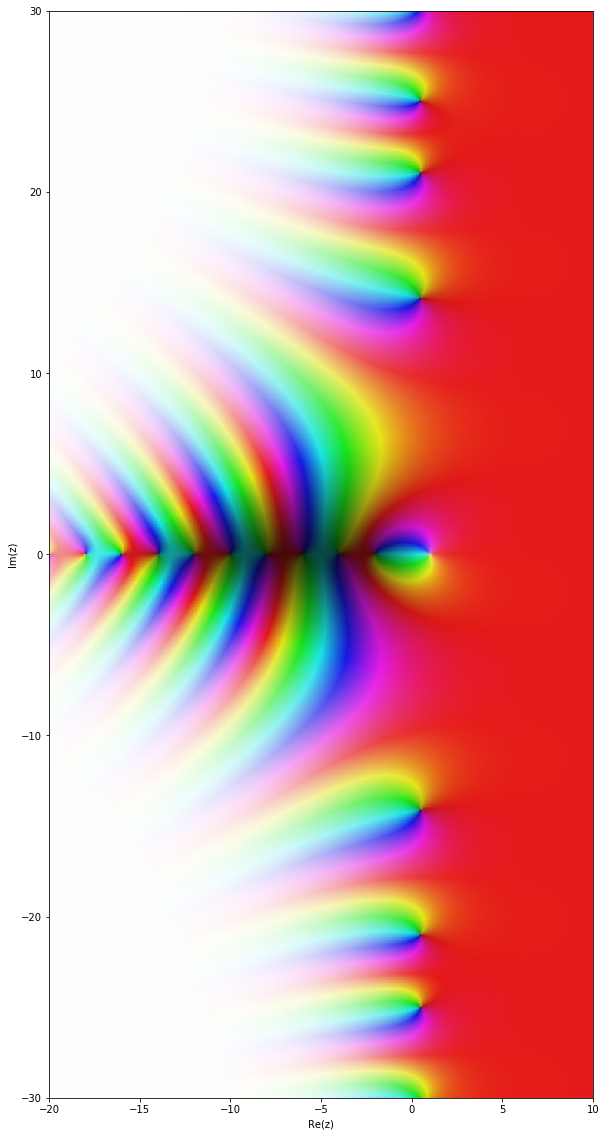

In [0]:
cplot(lambda z: zeta(z), [-20, 10], [-30, 30], points=1000000)

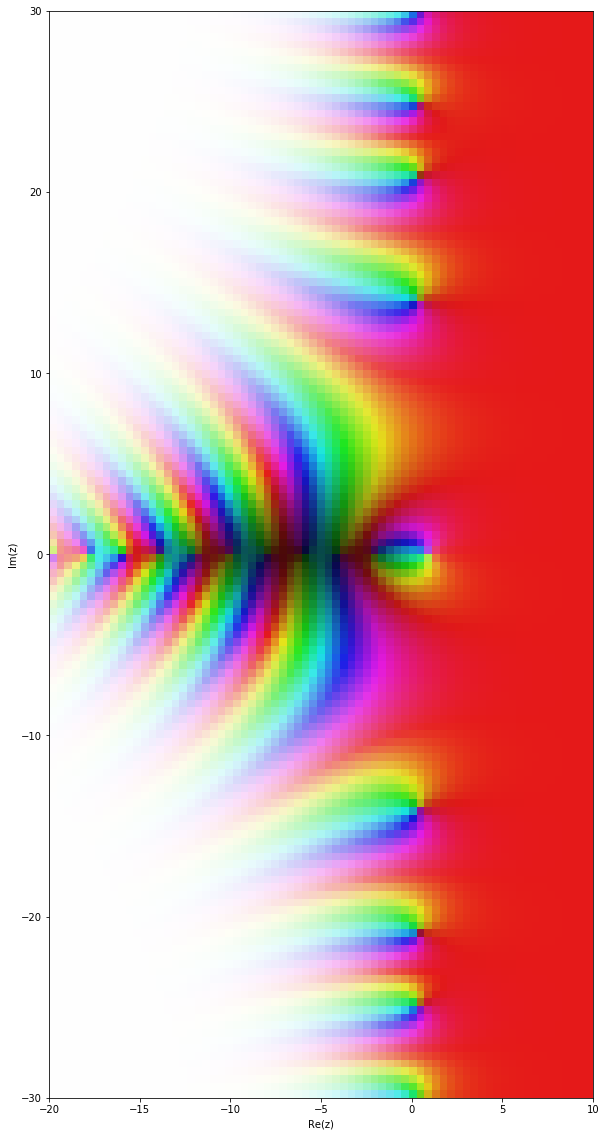

In [0]:
cplot(lambda z: zeta(z), [-20, 10], [-30, 30], points=10000)

In [0]:
mp.sqrt(zeta(2)*6)

mpf('3.1415926535897931')